In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
import missingno as msno
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import preprocessing

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('../input/titanic/train.csv')

df.drop(['PassengerId'], axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
df.value_counts()

Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare      Cabin    Embarked
0         1       Allison, Miss. Helen Loraine                         female  2.0   1      2      113781    151.5500  C22 C26  S           1
1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)             female  49.0  1      0      PC 17572  76.7292   D33      C           1
                  Hassab, Mr. Hammad                                   male    27.0  0      0      PC 17572  76.7292   D49      C           1
                  Hays, Miss. Margaret Bechstein                       female  24.0  0      0      11767     83.1583   C54      C           1
                  Hays, Mrs. Charles Melville (Clara Jennings Gregg)   female  52.0  1      1      12749     93.5000   B69      S           1
                                                                                                                                           ..
           

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


<AxesSubplot:>

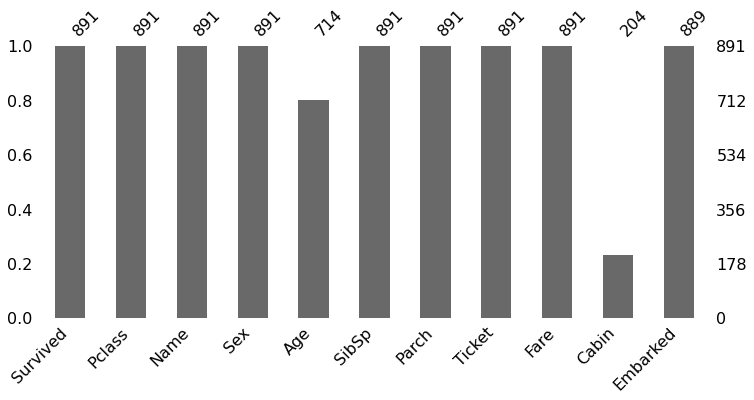

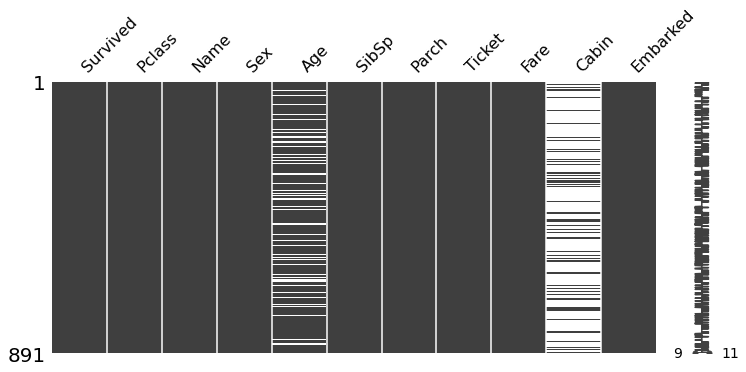

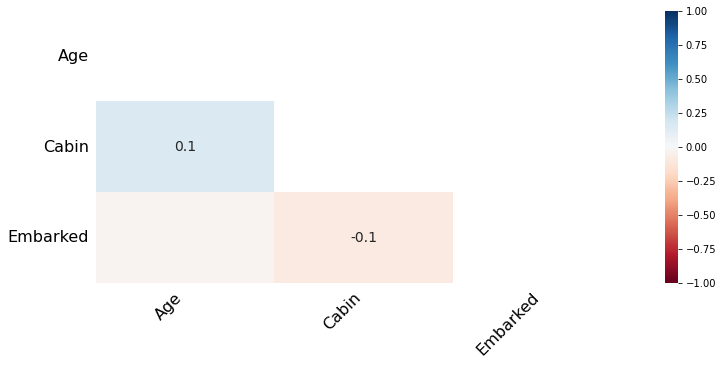

In [5]:
# Missing data display
total = df.isnull().sum().sort_values(ascending=False) 
percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False) 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
display(missing_data)

msno.bar(df,figsize=(12,5))
msno.matrix(df,figsize=(12,5))
msno.heatmap(df,figsize=(12,5))

In [6]:
# Dropping Embarked entries as it's completely random
df.dropna(subset=['Embarked'], inplace=True)

# Dropping Cabin column, as it's mostly missing and cannot be imputed
df.drop(['Cabin'], axis=1, inplace=True)

# Imputing Age column as its missing value percentage is low and we can use imputation
df['Age']=df['Age'].replace(np.NaN,df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


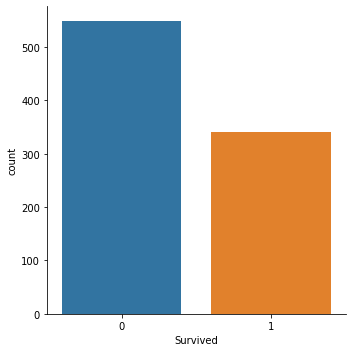

In [7]:
sns.catplot(x="Survived", kind="count", data=df)

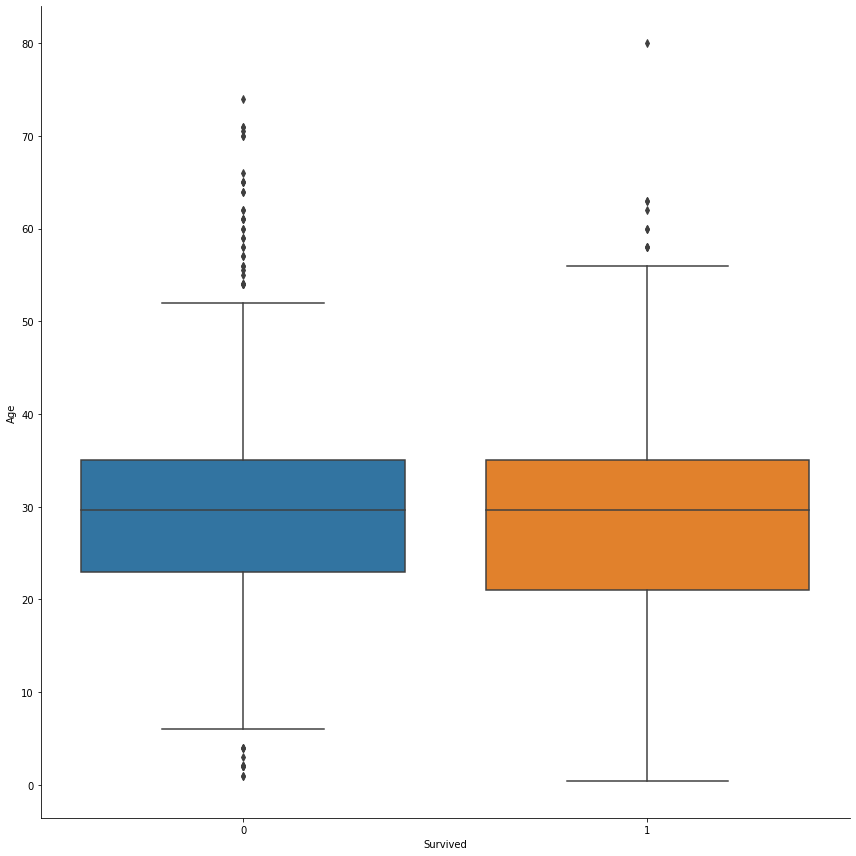

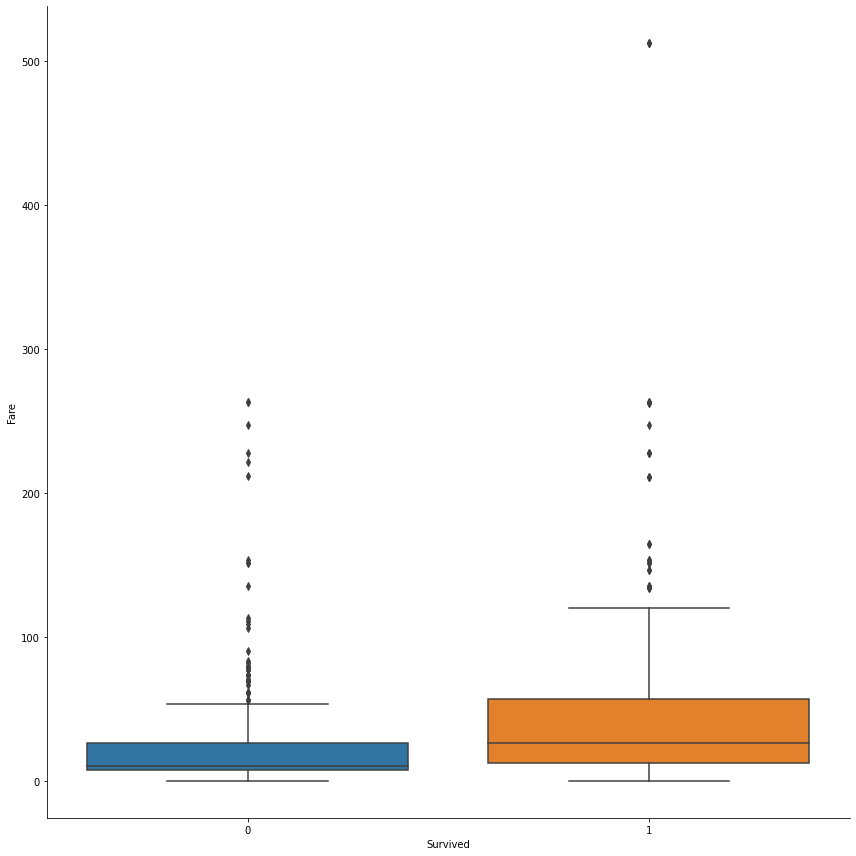

In [8]:
# Boxplot numeric features distribution for categorical target variable (filter out numeric categorical feature columns)
for column in df[df.columns.difference(['Survived','Pclass', 'Parch', 'SibSp'])].select_dtypes(include=['number']):  
    sns.catplot(x="Survived", y=column, kind="box", data=df, height=12)
    plt.show()

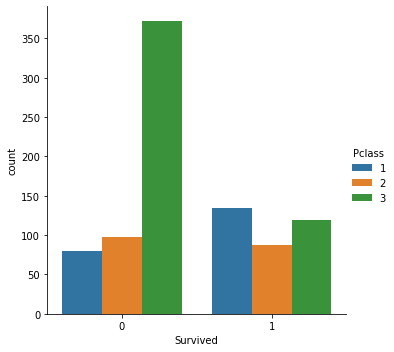

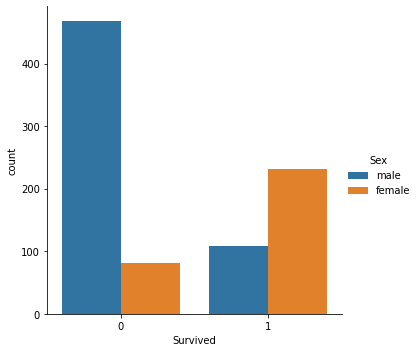

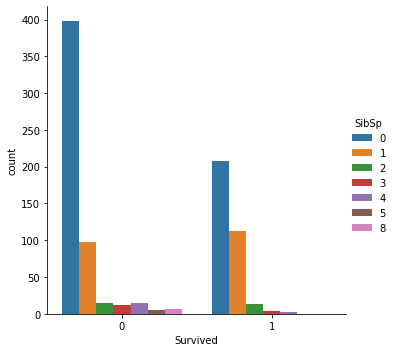

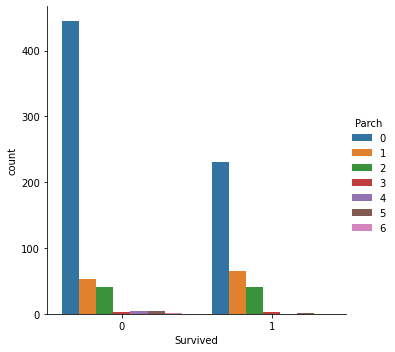

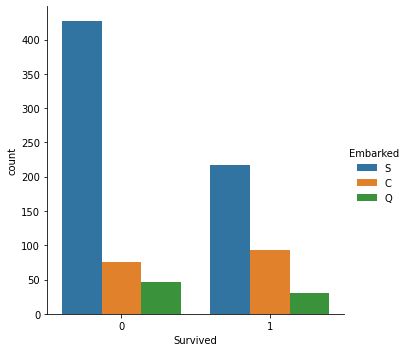

In [9]:
# Count plot between categorical target variable and categorial features 
for column in df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].columns:
    sns.catplot(x='Survived', hue=column, kind='count', data=df)
    plt.show()

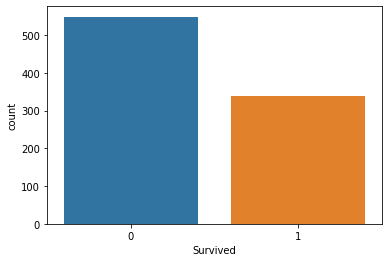

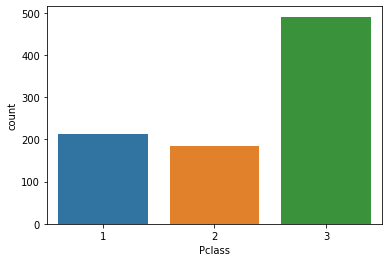

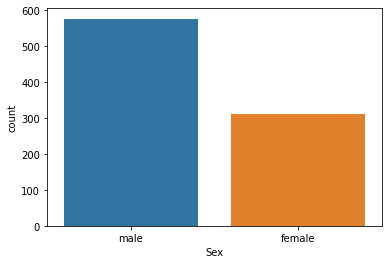

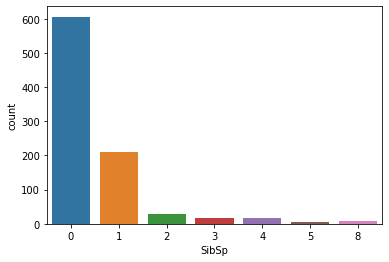

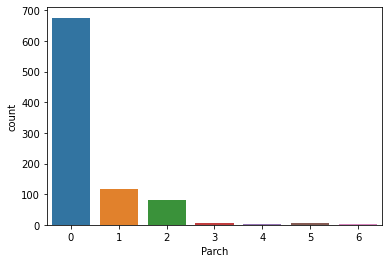

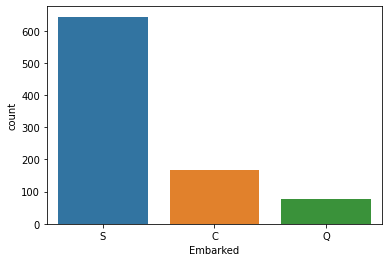

In [10]:
# Categorical value counts
for column in df.columns: 
    if df[column].nunique() < 20: 
        sns.countplot(x=column, data=df) 
        plt.show()

In [11]:
# Group numeric features by each categorical feature
for column in df.columns: 
    if df[column].nunique() < 20: 
        display(df.groupby(column).mean())

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.402116,0.553734,0.329690,22.117887
1,1.955882,28.414879,0.476471,0.467647,48.209498


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.626168,36.919078,0.420561,0.359813,84.193516
2,0.472826,29.863549,0.402174,0.380435,20.662183
3,0.242363,26.387464,0.615071,0.393075,13.675550


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.740385,2.166667,28.067407,0.698718,0.653846,44.252124
male,0.188908,2.389948,30.493569,0.429809,0.235702,25.523893


,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,
0,0.343234,2.356436,30.939301,0.186469,25.512794
1,0.535885,2.057416,30.034040,0.655502,44.147370
2,0.464286,2.357143,23.372367,0.642857,51.753718
3,0.250000,2.562500,17.848023,1.312500,68.908862
4,0.166667,3.000000,7.055556,1.500000,31.855556
5,0.000000,3.000000,10.200000,2.000000,46.900000
8,0.000000,3.000000,29.642093,2.000000,69.550000


,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.341716,2.325444,31.536699,0.238166,25.425788
1,0.550847,2.203390,24.775905,1.084746,46.778180
2,0.500000,2.275000,19.080689,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.549521,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.077436,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.472886,0.571429,0.413043,27.079812


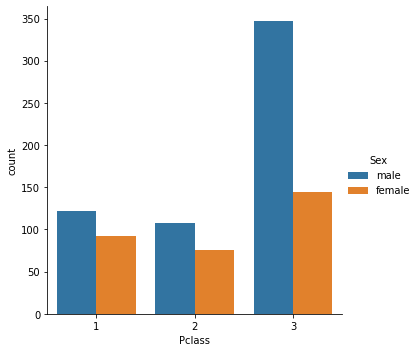

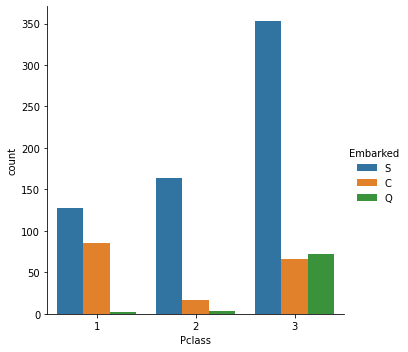

In [12]:
# Relationships count plot between categorial features
sns.catplot(x="Pclass", hue="Sex", kind="count", data=df)
plt.show()

sns.catplot(x="Pclass", hue="Embarked", kind="count", data=df)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.7+ KB


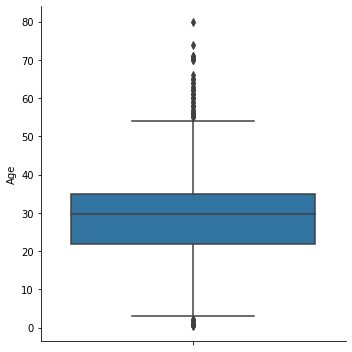

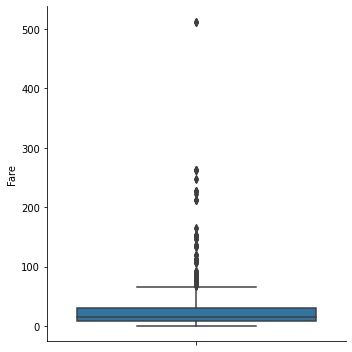

In [14]:
# Boxplot for single variable 
sns.catplot(y="Age", kind="box", data=df)
plt.show()
sns.catplot(y="Fare", kind="box", data=df)
plt.show()

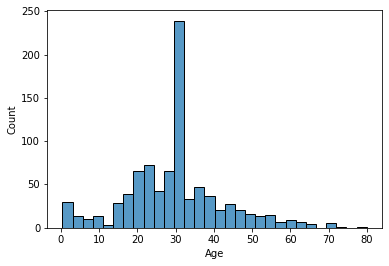

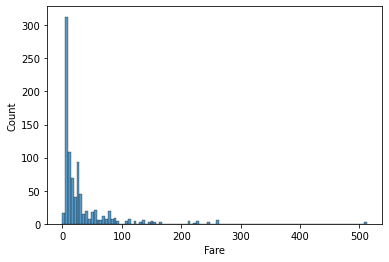

In [15]:
sns.histplot(df['Age'])
plt.show()
sns.histplot(df['Fare'])
plt.show()

In [16]:
# Outliers and normalizing distribution
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


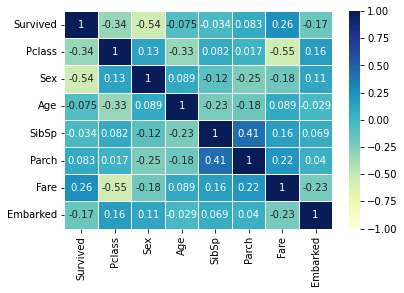

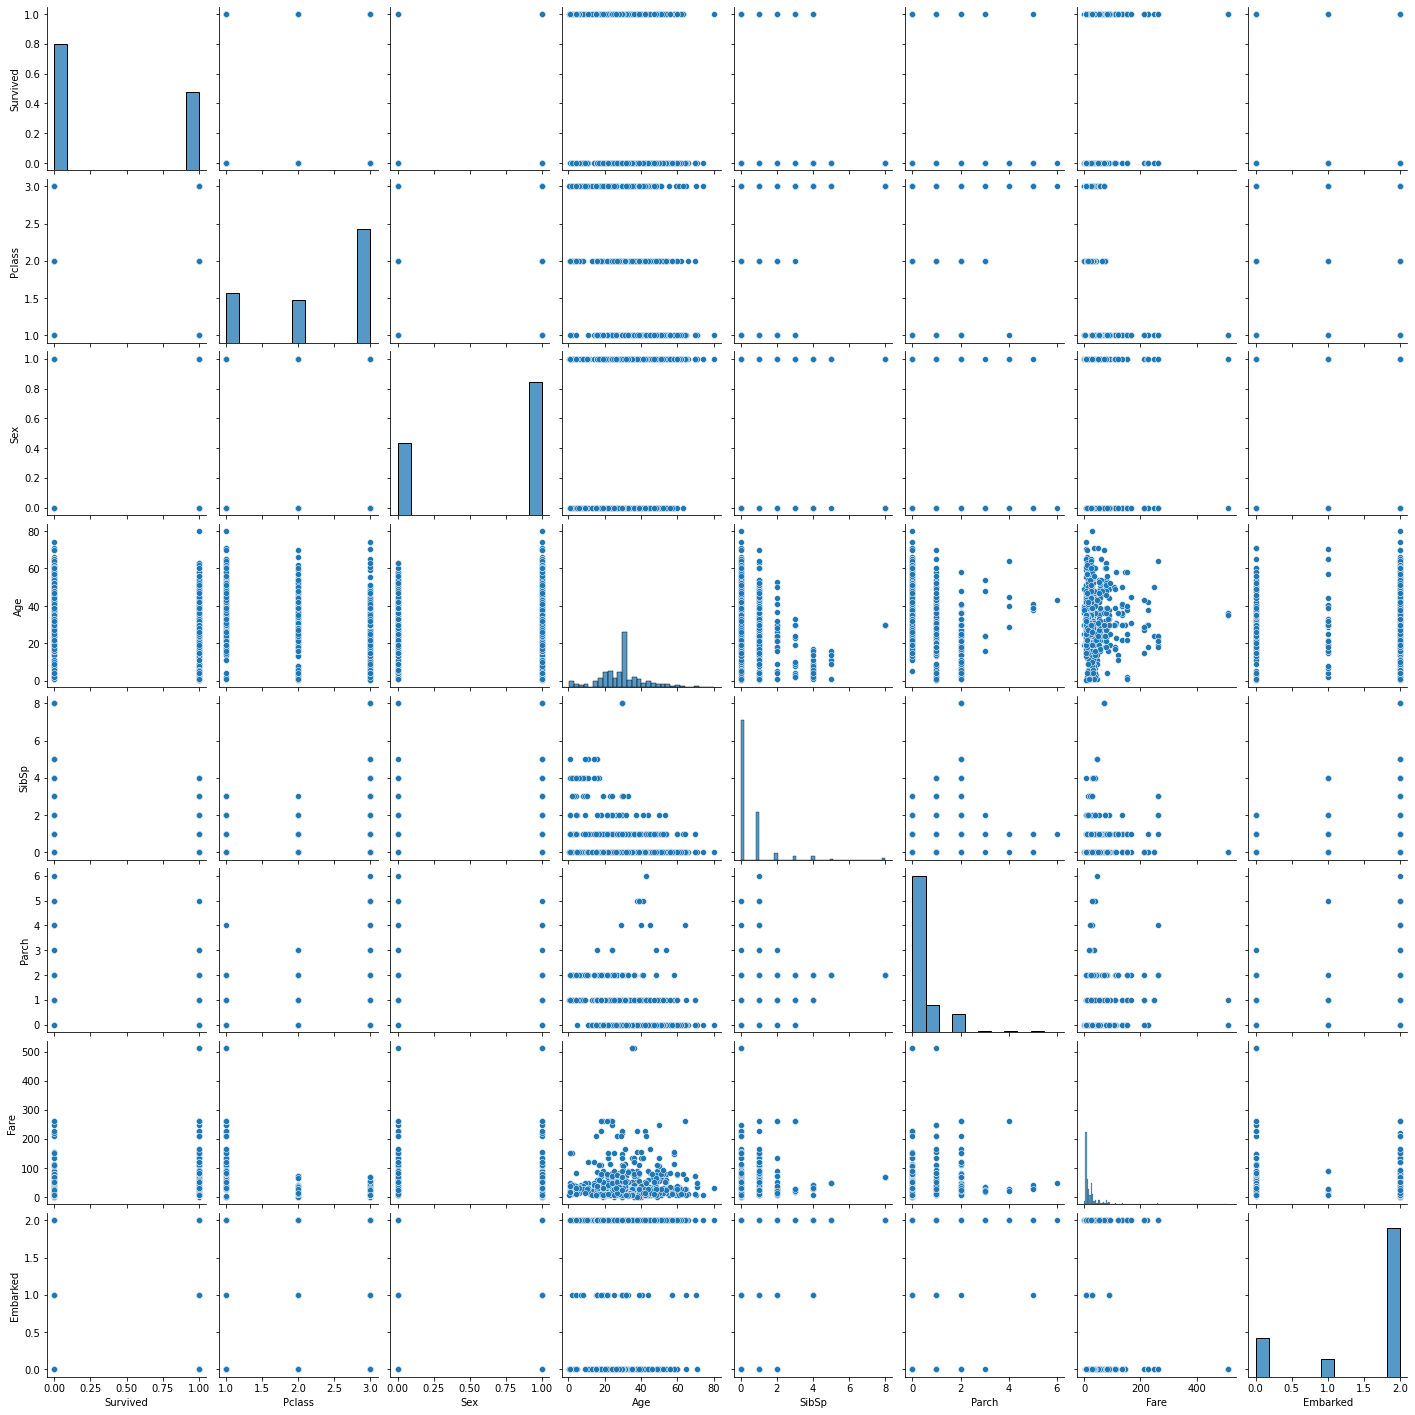

In [17]:
# Factorize categorical variables
for column in ['Embarked', 'Sex']:
    label_encoder = preprocessing.LabelEncoder() 
    df[column] = label_encoder.fit_transform(df[column])

# Data correlation map
sns.heatmap(df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu")

# Correlation between numeric features and target variable
df.corr()['Survived'].sort_values(ascending = False)

# Scatter plot between features
sns.pairplot(df, size = 2.5)